In [18]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import math

from utils.preprocessing import  label_encode
from utils.activition_functions import  linear
from utils.visualization import visualize_features, plot_decesion_boundary
from models.classifiers import Adaline
from utils.metrices import  accuracy

In [2]:
df = pd.read_csv('../data/penguins.csv')
df.tail()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
145,Chinstrap,50.8,18.5,201,male,4450
146,Chinstrap,50.1,17.9,190,female,3400
147,Chinstrap,49.0,19.6,212,male,4300
148,Chinstrap,51.5,18.7,187,male,3250
149,Chinstrap,49.8,17.3,198,female,3675


In [3]:
class1 = 'Gentoo'
class2 = 'Adelie'
feature1 = 'bill_depth_mm'
feature2 = 'body_mass_g'

In [4]:
df = df[(df['species'] == class1) | (df['species'] == class2)].copy()

In [5]:
df['gender'] = label_encode(df['gender'])
df['gender'][df['gender'] == -1] = df['gender'].max()
df['gender'].describe()

/tmp/ipykernel_43428/736352639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'][df['gender'] == -1] = df['gender'].max()


count    100.000000
mean       0.530000
std        0.501614
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: gender, dtype: float64

In [6]:
scaler = MinMaxScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
df

/tmp/ipykernel_43428/695404667.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,0.196078,0.666667,0.155172,1.0,0.233083
1,Adelie,0.211765,0.511905,0.241379,0.0,0.248120
2,Adelie,0.243137,0.583333,0.396552,0.0,0.082707
3,Adelie,0.215686,0.547619,0.241379,0.0,0.157895
4,Adelie,0.101961,0.738095,0.362069,0.0,0.142857
...,...,...,...,...,...,...
95,Gentoo,0.372549,0.095238,0.775862,0.0,0.578947
96,Gentoo,0.447059,0.095238,0.655172,0.0,0.368421
97,Gentoo,0.643137,0.333333,0.913793,1.0,0.729323
98,Gentoo,0.423529,0.023810,0.706897,0.0,0.639098


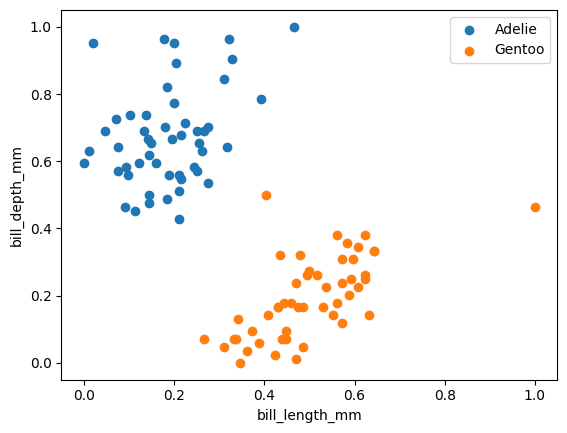

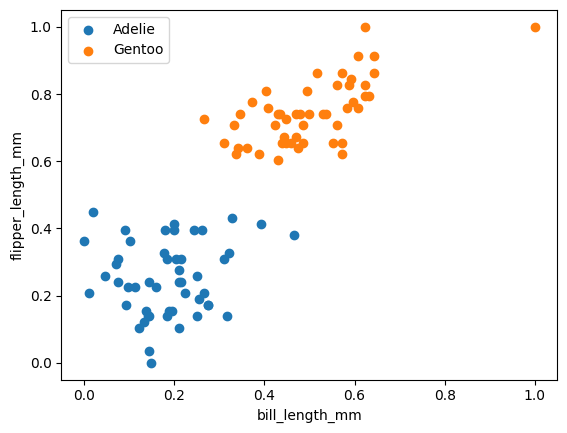

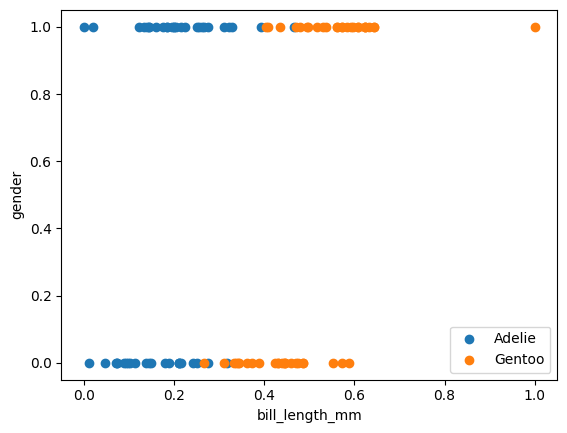

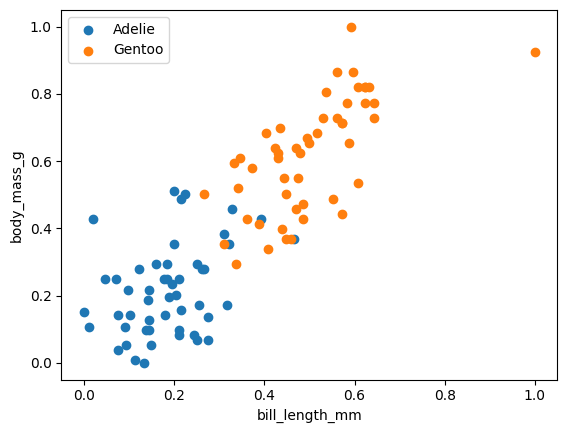

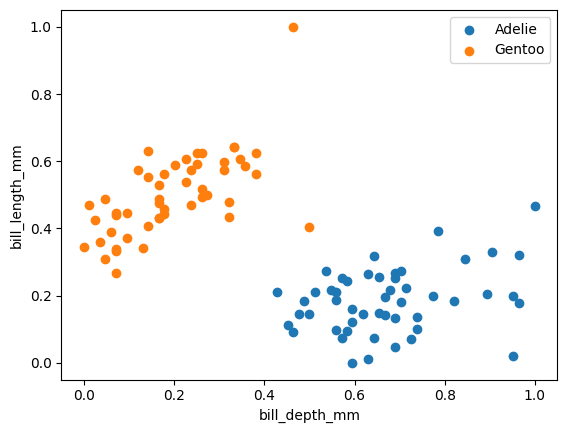

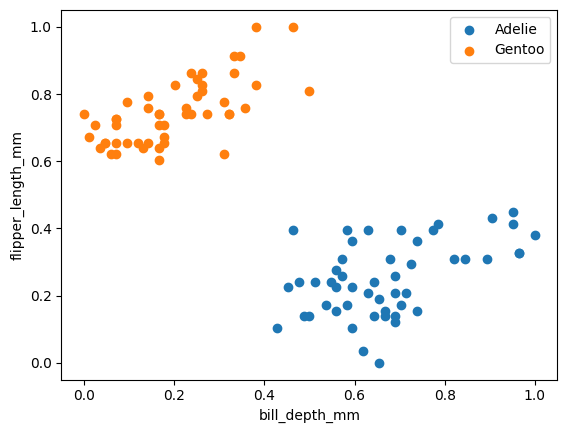

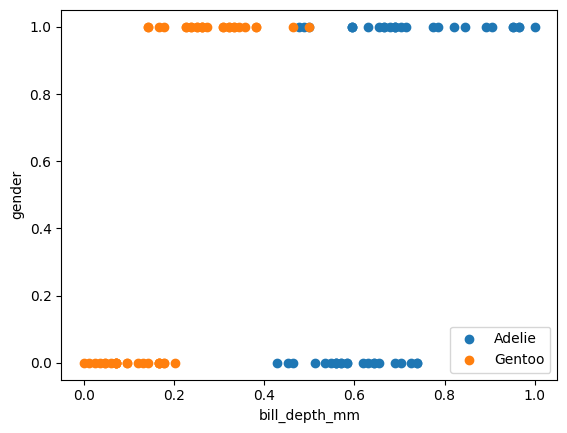

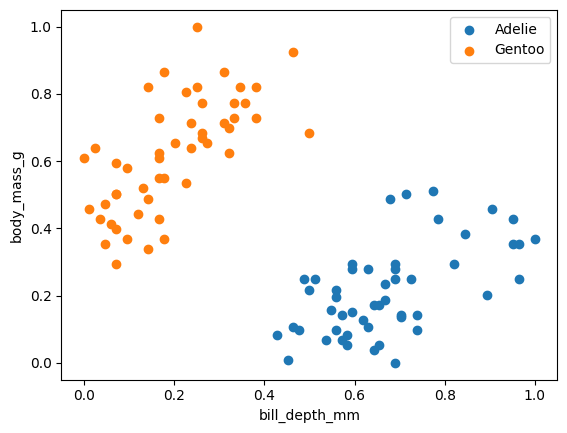

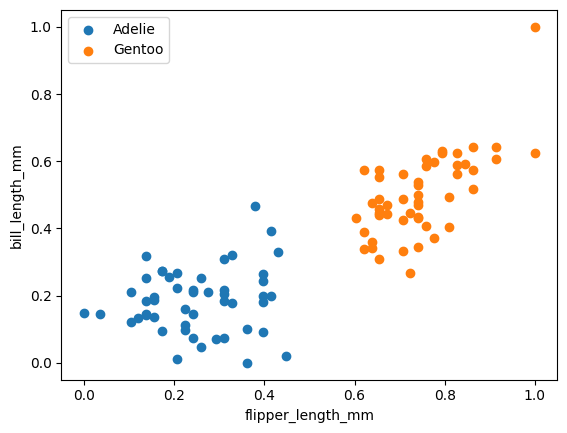

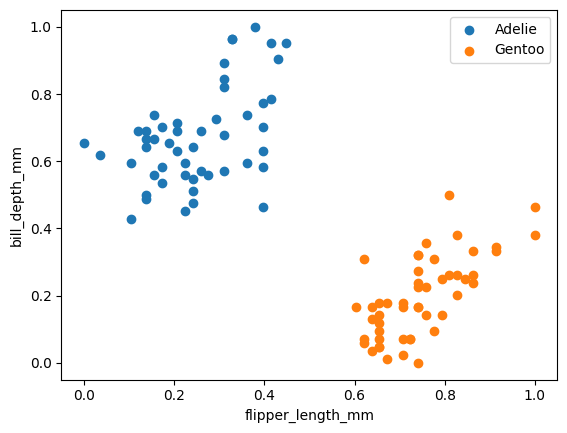

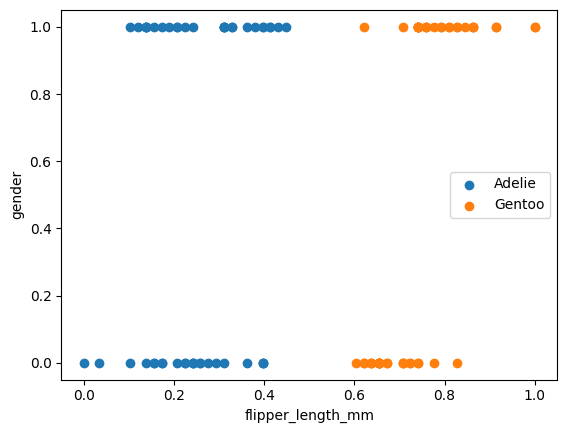

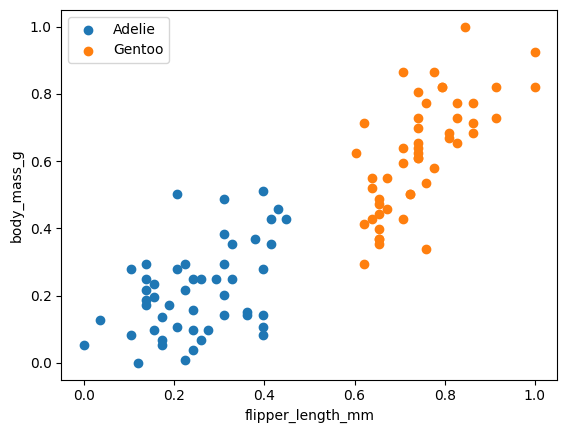

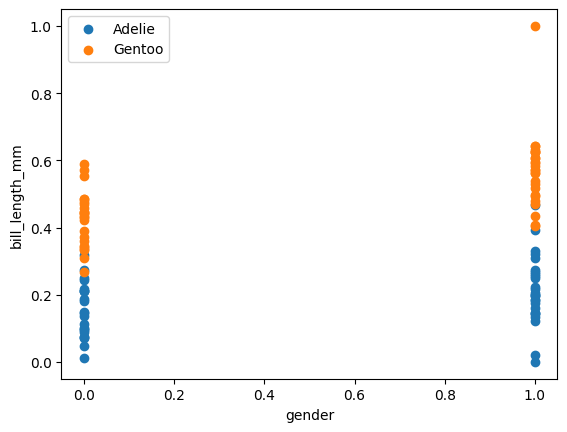

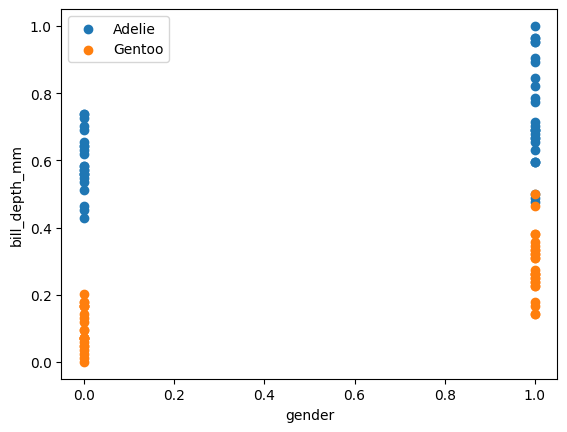

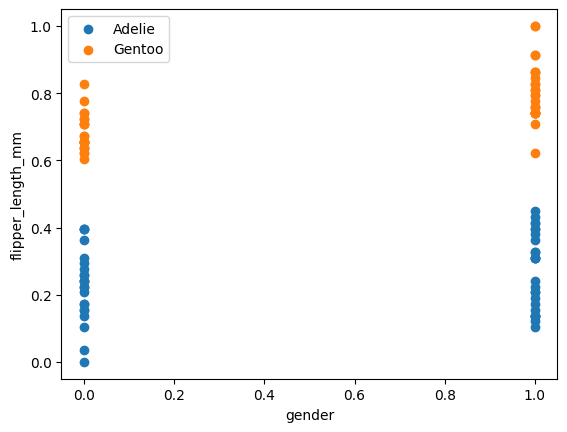

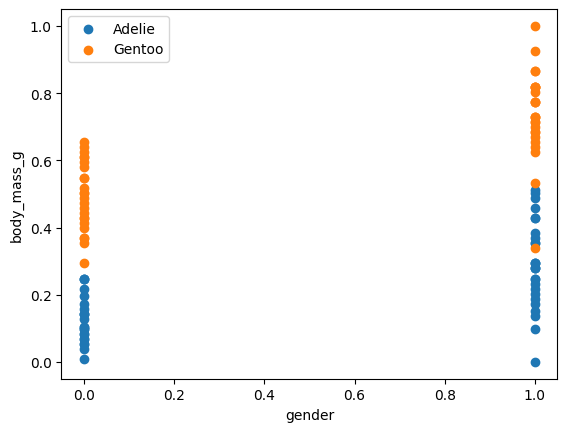

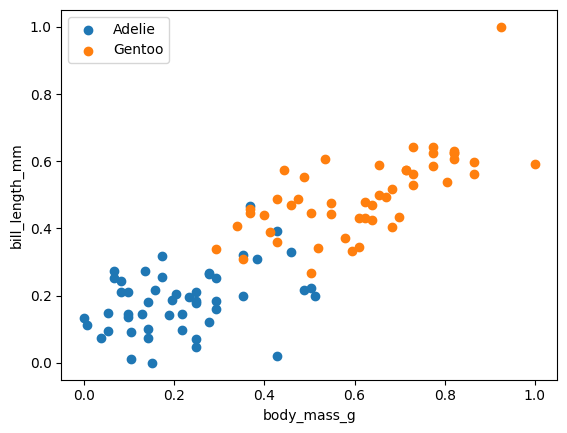

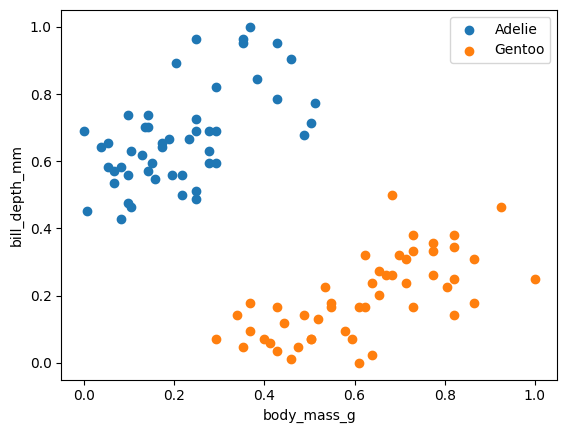

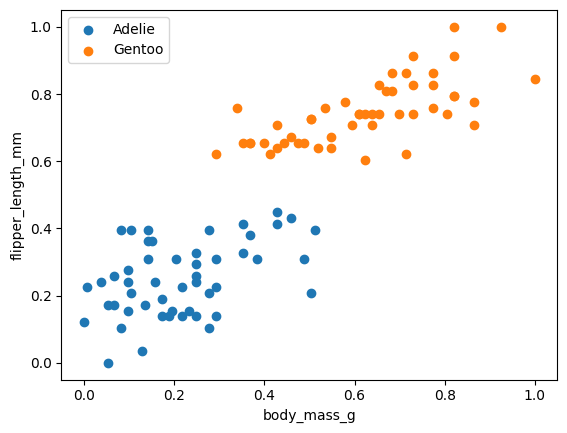

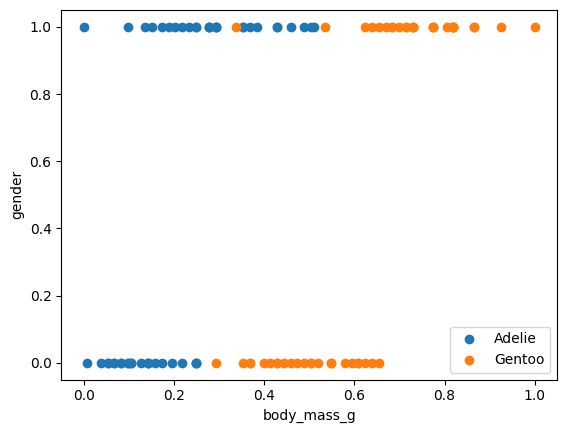

In [7]:
for f1 in df.columns[1:]:
    for f2 in df.columns[1:]:
        if f1 != f2:
            visualize_features(df, f1, f2, df.columns[0])

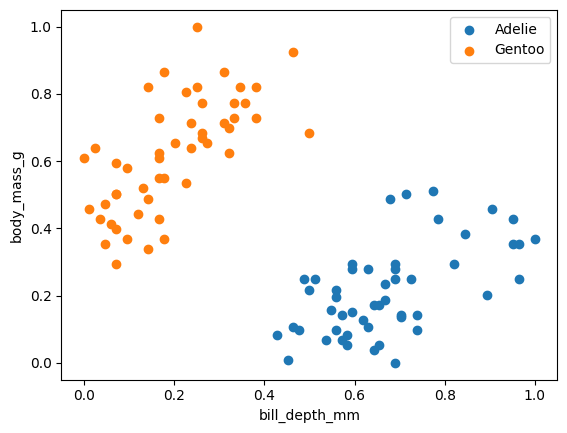

In [8]:
visualize_features(df, feature1, feature2, 'species')

In [9]:
C1 = df[df['species'] == class1].copy()
C1['species'] = 1
C1.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
50,1,0.470588,0.011905,0.672414,0.0,0.458647
51,1,0.623529,0.380952,1.000000,1.0,0.819549
52,1,0.572549,0.119048,0.655172,0.0,0.443609
53,1,0.623529,0.250000,0.793103,1.0,0.819549
54,1,0.529412,0.166667,0.741379,1.0,0.729323


In [10]:
C2 = df[df['species'] == class2].copy()
C2['species'] = -1
C2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,-1,0.196078,0.666667,0.155172,1.0,0.233083
1,-1,0.211765,0.511905,0.241379,0.0,0.248120
2,-1,0.243137,0.583333,0.396552,0.0,0.082707
3,-1,0.215686,0.547619,0.241379,0.0,0.157895
4,-1,0.101961,0.738095,0.362069,0.0,0.142857


In [11]:
C1_X = C1[[feature1, feature2]]
C1_D = C1['species']

C2_X = C2[[feature1, feature2]]
C2_D = C2['species']

In [12]:
C1_X_Train, C1_X_Test, C1_D_Train, C1_D_Test = train_test_split(C1_X, C1_D, test_size=0.4)
C2_X_Train, C2_X_Test, C2_D_Train, C2_D_Test = train_test_split(C2_X, C2_D, test_size=0.4)

In [13]:
print(f'C1_X_Train: {C1_X_Train.shape}')
print(f'C1_X_Test: {C1_X_Test.shape}')
print(f'C1_D_Train: {C1_D_Train.shape}')
print(f'C1_D_Test: {C1_D_Test.shape}')
print(f'C2_X_Train: {C2_X_Train.shape}')
print(f'C2_X_Test: {C2_X_Test.shape}')
print(f'C2_D_Train: {C2_D_Train.shape}')
print(f'C2_D_Test: {C2_D_Test.shape}')

C1_X_Train: (30, 2)
C1_X_Test: (20, 2)
C1_D_Train: (30,)
C1_D_Test: (20,)
C2_X_Train: (30, 2)
C2_X_Test: (20, 2)
C2_D_Train: (30,)
C2_D_Test: (20,)


In [14]:
X_Train = pd.concat([C1_X_Train, C2_X_Train]).to_numpy()
D_Train = pd.concat([C1_D_Train, C2_D_Train]).to_numpy()
X_Test = pd.concat([C1_X_Test, C2_X_Test]).to_numpy()
D_Test = pd.concat([C1_D_Test, C2_D_Test]).to_numpy()

In [29]:
model = Adaline(eta=0.1, n_iter=10)
model.fit(X_Train, D_Train)

In [30]:
model.mse_

0.04169060833358599

In [31]:
Y_Pred = model.predict(X_Test)

In [32]:
accuracy(Y_Pred, D_Test)

1.0

In [ ]:
f'accuray: {accuracy}'

# end

In [ ]:
Y_Train = np.zeros(shape=D_Train.shape)
for i, x in enumerate(X_Train):
    y = (x * W).sum()
    Y_Train[i] = y

df = df[(df['species'] == class1) | (df['species'] == class2)]
plot_decesion_boundary(df, feature1, feature2, 'species', X_Train, Y_Train)

In [ ]:
df

In [ ]:
conf_y_train = np.zeros(shape=D_Train.shape)

for i in D_Train:
    conf_y_train[i] = linear(D_Train[i])

conf_y_train

In [ ]:
conf_y_pred = np.zeros(shape=Y_Train.shape)

for i in range(40):
    conf_y_pred[i]=linear(Y_Train[i])

conf_y_pred

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

cm=confusion_matrix(conf_y_train, conf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=None)
disp.plot()
plt.show()


In [ ]:
cm

In [ ]:
Numb_of_classes = np.unique(conf_y_train)

conf_matrix = np.zeros((len(Numb_of_classes), len(Numb_of_classes)))

for i in range(len(Numb_of_classes)):
        for j in range(len(Numb_of_classes)):
           conf_matrix[i, j] = np.sum((conf_y_train == Numb_of_classes[i]) & (conf_y_pred == Numb_of_classes[j]))
conf_matrix


In [27]:
y_pred = np.array([1, 1, 2, 3])
y_true = np.array([1, 1, 0, 3])
(y_pred == y_true).sum() / y_true.shape[0]

0.75